In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('train_pca.csv')
train_clean = pd.read_csv("train_clean_data.csv")
df = df.drop(['Unnamed: 0'],axis=1)

In [11]:
df.head()

,0,1,2
0,4.486696,0.928857,-2.276332
1,5.181728,1.123534,0.952564
2,-3.783016,0.723012,-1.018953
3,-3.632713,-0.285356,-1.718415
4,-4.009857,0.668512,-0.138392


In [21]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# K-means

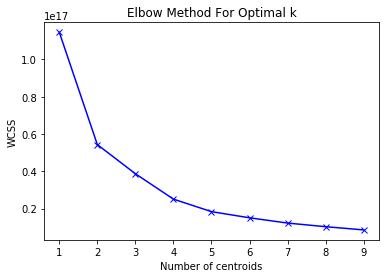

In [6]:
wcss = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
df1 = df.sample(n = 1000)

Text(0.5, 0.92, 'K-means Model')

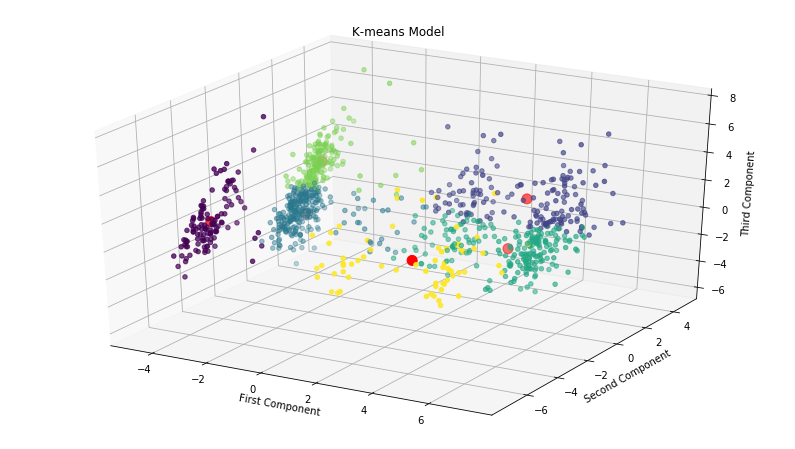

In [14]:
#as the graph shows, we decide to assign k=5.
pca=pd.DataFrame(df1)
pca.columns=['First Component','Second Component','Third Component']
kmeans = KMeans(n_clusters=6, random_state=0).fit(pca)
y_sample = kmeans.predict(pca)

#plotting the results 
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
ax.scatter3D(pca['First Component'], pca['Second Component'], pca['Third Component'], c=y_sample, cmap='viridis');
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],  c='red', s=100)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.set_title('K-means Model')

In [34]:
# run the k-means model
kmeans = KMeans(n_clusters=6, random_state=0).fit(pca)
y_kmeans = kmeans.predict(df)
y_kmeans

array([3, 1, 2, ..., 3, 2, 1], dtype=int32)

In [37]:
type(y_kmeans)

numpy.ndarray

In [29]:
y_kmeans = pd.Series(y_kmeans, )

In [18]:
train_clean = train_clean.drop(['Unnamed: 0'],axis=1)
train_clean.head()

,AMT_ANNUITY,AMT_CREDITSK_ID_CURR,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,NAME_YIELD_GROUP_high,NAME_YIELD_GROUP_low_action,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_middle,NAME_CONTRACT_STATUSSK_ID_CURR_Active,NAME_CONTRACT_STATUSSK_ID_CURR_Approved.1,NAME_CONTRACT_STATUSSK_ID_CURR_Completed,NAME_CONTRACT_STATUSSK_ID_CURR_Demand,NAME_CONTRACT_STATUSSK_ID_CURR_Returned to the store,NAME_CONTRACT_STATUSSK_ID_CURR_Signed
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,1,0,0,0,0,0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
3,29686.5,312682.5,297000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0


In [62]:
kmeans_train = pd.concat([train_clean, y_kmeans], axis=1, sort=False)

In [64]:
from sklearn.mixture import GaussianMixture

In [74]:
gmm = GaussianMixture(n_components=6).fit(pca)

In [75]:
y_sample2 = gmm.predict(pca)

Text(0.5, 0.92, 'Gaussian Mixture Model')

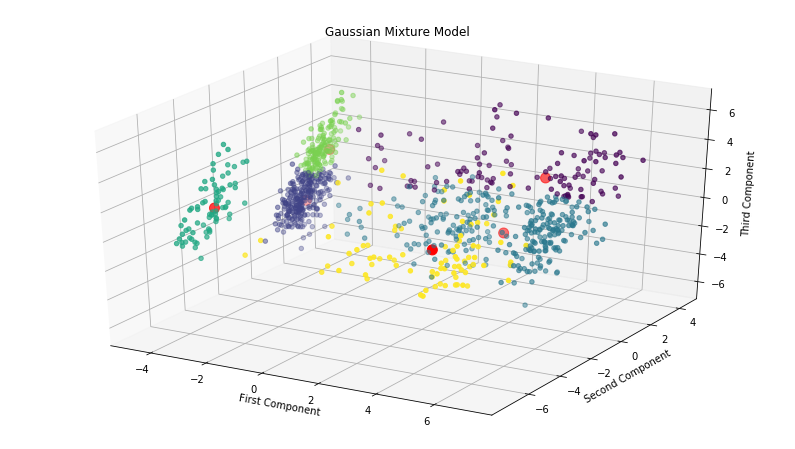

In [77]:
fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection='3d')
ax.scatter3D(pca['First Component'], pca['Second Component'], pca['Third Component'], c=y_sample2, cmap='viridis');
centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2],  c='red', s=100)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')
ax.set_title('Gaussian Mixture Model')